### Backtest the ma_crossover Strategy

In [1]:
import sys
import os

# Get the path to the project root (adjust the number of '..' as needed)
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

# Add the project root to the system path
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added to sys.path:", project_root)

Project root added to sys.path: /Users/admin/Desktop/Data Science/Trading-Bot


/Users/admin/Desktop/Data Science/Trading-Bot/src/backtest/ma_crossover.py:42: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df['position'] = df['signal'].replace(to_replace=0, method='ffill').shift(1).fillna(0)


<Axes: title={'center': 'MA Crossover Strategy Equity Curve'}>

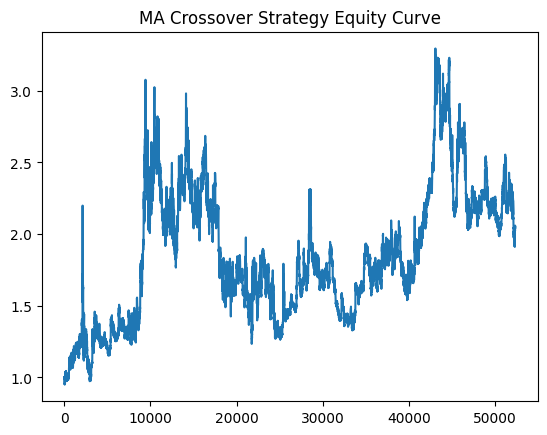

In [2]:
import pandas as pd
import numpy as np

from src.models.labels import add_future_return_label
from src.backtest.ma_crossover import ma_crossover_strategy

df = pd.read_parquet("../data/processed/btc_1h.parquet")

df = add_future_return_label(df)
df = ma_crossover_strategy(df)

df["equity"] = (1 + df["strategy_return"]).cumprod()

df["equity"].plot(title="MA Crossover Strategy Equity Curve")


In [3]:
#Metrics: 
total_return = df["equity"].iloc[-1] - 1
sharpe = np.sqrt(252*24) * df["strategy_return"].mean() / df["strategy_return"].std()

print("Total Return:", round(total_return, 2))
print("Sharpe:", round(sharpe, 2))


Total Return: 1.05
Sharpe: 0.42


### After creating metrics.py

In [4]:
from src.backtest.metrics import performance_summary

stats = performance_summary(df)

for k, v in stats.items():
    print(f"{k}: {round(v, 3)}")


total_return: 1.048
sharpe: 0.419
win_rate: 0.489
max_drawdown: -0.599
num_trades: 1819


<Axes: title={'center': 'Drawdown'}>

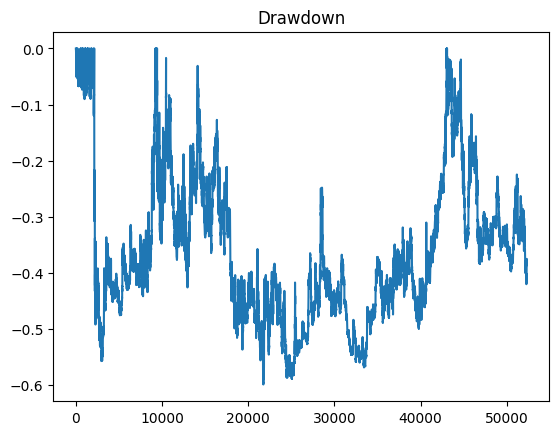

In [5]:
drawdown = (df["equity"] / df["equity"].cummax()) - 1
drawdown.plot(title="Drawdown")
